In [1]:
import pandas as pd

In [2]:
df_orders = pd.read_csv('sample_submission.csv')

In [3]:
%%time
products_tables = [
  'tab_2_products_2020-01-01.csv',
  'tab_2_products_2020-01-11.csv',
  'tab_2_products_2020-01-21.csv',
  'tab_2_products_2020-01-31.csv',
  'tab_2_products_2020-02-10.csv',
  'tab_2_products_2020-03-01.csv',
  'tab_2_products_2020-03-11.csv',
  'tab_2_products_2020-03-21.csv',
  'tab_2_products_2020-03-31.csv',
  'tab_2_products_2020-04-10.csv',
  'tab_2_products_2020-04-20.csv',
  'tab_2_products_2020-04-30.csv',
  'tab_2_products_2020-05-20.csv',
  'tab_2_products_2020-05-30.csv',
  'tab_2_products_2020-06-09.csv',
  'tab_2_products_2020-06-19.csv',
  'tab_2_products_2020-06-29.csv',
  'tab_2_products_2020-07-19.csv',
  'tab_2_products_2020-07-29.csv',
  'tab_2_products_2020-08-08.csv',
  'tab_2_products_2020-08-18.csv',
  'tab_2_products_2020-08-28.csv',
  'tab_2_products_2020-09-07.csv',
]

df_products = []
for i,product_table in enumerate(products_tables):
  df_products.append(pd.read_csv(product_table))

CPU times: user 1min 30s, sys: 22.2 s, total: 1min 53s
Wall time: 1min 59s


In [4]:
df_full_products = pd.concat([*df_products])

In [5]:
df_orders = pd.read_csv('tab_1_orders.csv', parse_dates=['order_created_time'])

df_categories = pd.read_csv('tab_3_categories.csv')

df_user_profiles = pd.read_csv('tab_4_user_profiles.csv')

df_product_properties = pd.read_csv('tab_5_product_properties.csv')

df_city = pd.read_csv('tab_6_city.csv')

df_sample_submission = pd.read_csv('sample_submission.csv')

In [20]:
df_orders.head()

,user_id,order_id,order_created_time,retailer,store_id,platform
0,72,17431000,2020-09-26 10:48:57,METRO,21,app
1,83,9718154,2020-05-08 09:46:18,METRO,87,web
2,142,10056850,2020-05-14 15:06:03,METRO,320,app
3,187,15952443,2020-09-01 17:34:00,ВкусВилл,533,app
4,224,10409918,2020-05-20 06:32:50,Ашан,183,web


In [11]:
df_categories.head()

,id,name,parent_id
0,1,Продукты питания,0
1,2,Замороженные продукты,1
2,3,Замороженные овощи и фрукты,2
3,4,Замороженные полуфабрикаты,2
4,5,Рыба замороженная,2


In [12]:
df_user_profiles.head()

,user_id,gender,bdate
0,2224890,NaN,NaN
1,1683001,male,1987-10-11
2,2102480,NaN,NaN
3,2224895,NaN,NaN
4,930197,NaN,NaN


In [13]:
df_product_properties.head()

,product_id,property_name,property_value
0,1,Вес,100 г
1,2,Вид,Молочный напиток
2,2,Вес,100 г
3,2,Вкус,Черника
4,2,Сырье,Натуральное молоко


In [14]:
df_city.head 

,store_id,city_name
0,14,Москва
1,21,Москва
2,1,Москва
3,4,Москва
4,7,Москва


In [15]:
df_sample_submission.head()

,Id,Predicted
0,51,3239211 10720024 8493844 1965540 5009002 95218...
1,65,11693356 13392267 2464515 2245175 4748570 1134...
2,766,12773054 3692749 12726751 10041624 11893515 23...
3,1132,8613934 3599065 575614 4821474 11609320 699047...
4,1578,289404 4328240 3129788 9390886 11166655 173077...


In [16]:
df_orders.columns

Index(['user_id', 'order_id', 'order_created_time', 'retailer', 'store_id',
       'platform'],
      dtype='object')

In [35]:
df_orders[['order_created_time', 'retailer', 'store_id', 'platform']]

,order_created_time,retailer,store_id,platform
0,2020-09-26 10:48:57,METRO,21,app
1,2020-05-08 09:46:18,METRO,87,web
2,2020-05-14 15:06:03,METRO,320,app
3,2020-09-01 17:34:00,ВкусВилл,533,app
4,2020-05-20 06:32:50,Ашан,183,web
...,...,...,...,...
2461953,2020-09-01 15:41:27,Лента,218,app
2461954,2020-09-17 10:16:16,Лента,130,app
2461955,2020-04-29 10:09:37,Лента,373,app
2461956,2020-09-30 09:18:19,Лента,781,undefined


In [9]:
df_orders['period'] = (df_orders['order_created_time'].dt.hour % 24 + 1) 
"""df_orders['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)"""

"df_orders['period'].replace({1: 'Late Night',\n                      2: 'Early Morning',\n                      3: 'Morning',\n                      4: 'Noon',\n                      5: 'Evening',\n                      6: 'Night'}, inplace=True)"

In [10]:
df_orders.period.value_counts()

10    178980
11    178222
9     176585
12    171527
8     163399
13    159606
14    148386
7     140464
15    137568
16    123650
17    113687
18    110432
6     106928
19    106188
20     98152
21     78525
5      71646
22     50059
4      44292
23     28183
3      26554
24     18389
2      16809
1      13727
Name: period, dtype: int64

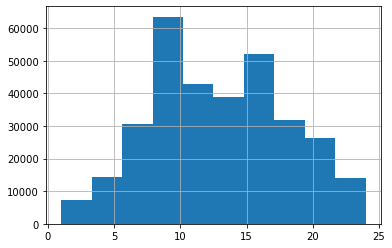

In [16]:
import matplotlib.pyplot as plt

df_orders[df_orders['order_created_time'] < '2020-04-01'].period.sort_values().hist()

[Text(0, 0, 'METRO'),
 Text(0, 0, 'Лента'),
 Text(0, 0, 'Ашан'),
 Text(0, 0, 'МЕГАМАРТ'),
 Text(0, 0, 'ВкусВилл'),
 Text(0, 0, 'BILLA'),
 Text(0, 0, 'SELGROS'),
 Text(0, 0, 'ВИКТОРИЯ'),
 Text(0, 0, 'Командор'),
 Text(0, 0, 'REAL')]

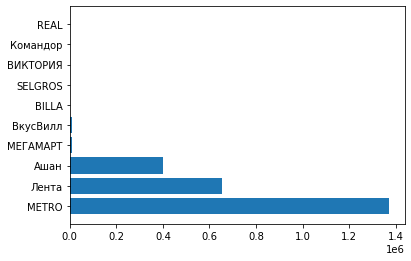

In [56]:
import numpy as np
ret = ['METRO', 'Лента', 'Ашан', 'МЕГАМАРТ', 'ВкусВилл', 'BILLA', 'SELGROS', 'ВИКТОРИЯ', 'Командор', 'REAL']
y_pos = np.arange(len(ret))
fig, ax = plt.subplots()
ax.barh(y_pos, df_orders.retailer.value_counts()[:10])

ax.set_yticks(y_pos)
ax.set_yticklabels(ret)

[Text(0, 0, 'МЕГАМАРТ'),
 Text(0, 0, 'ВкусВилл'),
 Text(0, 0, 'BILLA'),
 Text(0, 0, 'SELGROS'),
 Text(0, 0, 'ВИКТОРИЯ'),
 Text(0, 0, 'Командор'),
 Text(0, 0, 'REAL'),
 Text(0, 0, 'Азбука Вкуса'),
 Text(0, 0, 'Аллея'),
 Text(0, 0, 'Бахетле')]

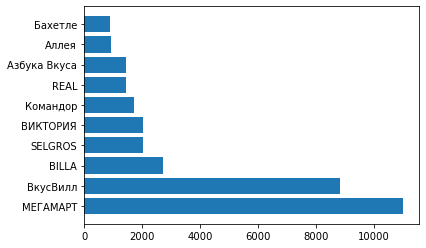

In [17]:
import numpy as np
ret = ['МЕГАМАРТ', 'ВкусВилл', 'BILLA', 'SELGROS', 'ВИКТОРИЯ', 'Командор', 'REAL', 'Азбука Вкуса', 'Аллея', 'Бахетле']
y_pos = np.arange(len(ret))
fig, ax = plt.subplots()
ax.barh(y_pos, df_orders.retailer.value_counts()[3:13])

ax.set_yticks(y_pos)
ax.set_yticklabels(ret)

In [ ]:
df_orders.retailer.value_counts()[:10].shape

In [18]:
df_full_products = pd.concat([*df_products])

In [19]:
df_full_orders = pd.merge(df_orders, df_full_products, how='inner', on=["order_id"] )

In [24]:
df_full_orders.head()

,user_id_x,order_id,order_created_time,retailer,store_id,platform,period,user_id_y,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id
0,83,9718154,2020-05-08 09:46:18,METRO,87,web,10,83,112927764,649.0,1,0.0,Набор шампуров Forester с деревянными ручками ...,74993,Forester,432.0,429
1,83,9718154,2020-05-08 09:46:18,METRO,87,web,10,83,112928139,499.0,1,0.0,Набор шампуров Forester больших 55 см,38831,Forester,432.0,429
2,83,9718154,2020-05-08 09:46:18,METRO,87,web,10,83,112928452,429.0,1,0.0,Решетка FireWood для барбекю 2005,4593463,FireWood,432.0,429
3,83,9718154,2020-05-08 09:46:18,METRO,87,web,10,83,112928905,999.0,1,0.0,Решетка-гриль Forester объемная большая 26 х 3...,63102,Forester,432.0,429
4,83,9718154,2020-05-08 09:46:18,METRO,87,web,10,83,112929150,85.0,1,0.0,Средство для розжига Metro Professional,198543,Metro Professional,434.0,429


In [23]:
df_full_orders[['retailer', 'price']].groupby('retailer').mean().sort_values(by='price', ascending=False)[:10]

,price
retailer,
Оптоклуб РЯДЫ,521.989990
Азбука Вкуса,210.732973
Home Market,207.772759
Улыбка Радуги,205.000000
"ТЦ ""Новомариинский""",162.697400
МАГНОЛИЯ,159.352143
ЮгОпт,155.578749
ПАРУС,145.643433
СЕДЬМАЯ СТОЛИЦА,145.449348


In [67]:
df_full_orders['month'] = df_full_orders['order_created_time'].dt.month

In [55]:
num_checks_per_retailer = df_full_orders[['order_id', 'retailer']].groupby('retailer').count().sort_values(by='order_id', ascending=False)

In [ ]:
num_checks_per_retailer = df_full_orders[['order_id', 'retailer']].groupby('retailer').count().sort_values(by='order_id', ascending=False)

In [80]:
revenue_per_month = df_full_orders[['retailer', 'month',  'price']].groupby(['retailer', 'month']).sum().reset_index()[['retailer',  'price']].groupby('retailer').mean()
revenue_per_month.columns = ['revenue_per_month']

In [97]:
mean_per_ret_and_check = df_full_orders[['order_id', 'retailer', 'price']].groupby(['retailer', 'order_id']).mean().sort_values(by='order_id', ascending=False)
mean_check_per_retailer = mean_per_ret_and_check.reset_index()[['retailer', 'price']].groupby('retailer').mean().sort_values(by='price', ascending=False)

In [98]:
res = pd.merge(mean_check_per_retailer, num_checks_per_retailer, how='inner', on=["retailer"] ).sort_values(by='order_id', ascending=False)
res.columns = (['mean_price', 'num_orders'])

In [99]:
res = pd.merge(res, revenue_per_month, how='inner', on=["retailer"] ).sort_values(by='num_orders', ascending=False)
res = res.sort_values(by=['revenue_per_month'], ascending=False)

In [100]:
res[3:].describe().iloc[1]

mean_price              157.333023
num_orders            10357.428571
revenue_per_month    132378.547924
Name: mean, dtype: float64

In [33]:
df_full_orders[['order_id', 'retailer', 'price']].groupby(['retailer', 'order_id']).mean().sort_values(by='order_id', ascending=False)[['price']].groupby().mean()

price    151.825762
dtype: float64